
### **ARPU Analysis / Business KPIs**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading validated dataset -- data/processed/validated_df.csv
df = pd.read_csv("../data/processed/validated_df.csv")

#### **1. Basic ARPU by churn**

ARPU = mean(MonthlyCharges) across Churn = Yes and Churn = No.

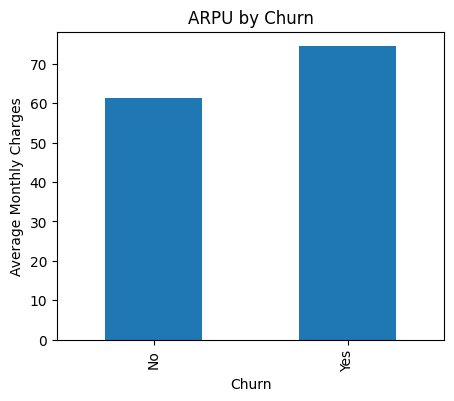

In [5]:
# Grouping by Churn value to calculate average Monthly Charges for each group
# APRU = Average Revenue Per User
plt.figure(figsize=(5,4))
df.groupby("Churn")["MonthlyCharges"].mean().plot(kind='bar')
plt.ylabel("Average Monthly Charges")
plt.title("ARPU by Churn")
plt.show()

- Customers paying higher monthly charges are more likely to churn.
- Losing high-paying customers has a bigger impact on revenue.

#### **2. ARPU by Tenure Group**
Analysising the ARPU based on the tenures such as:
- 0–12 months
- 13–36 months
- 37–60 months
- 60+ months

C:\Users\Rix\AppData\Local\Temp\ipykernel_15816\1164769774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arpu_by_tenure_churn = df.groupby(['tenure_group', 'Churn'])['MonthlyCharges'].mean().unstack()


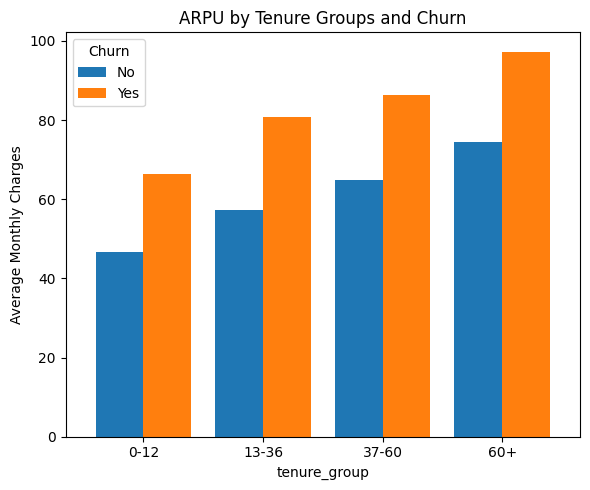

In [33]:
# Tenure group bins
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,36,60,100],
    labels=['0-12', '13-36', '37-60','60+']
)

# Group by tenure group and Churn
arpu_by_tenure_churn = df.groupby(['tenure_group', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_tenure_churn.plot(
    kind='bar',
    figsize=(6,5),
    width=0.8  # adjust bar width if needed
)
plt.ylabel("Average Monthly Charges")
plt.title("ARPU by Tenure Groups and Churn")
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Key Insights: ARPU by Tenure Groups**
- **Strong Positive Correlation:** There is a clear and direct relationship where customer value (ARPU) increases with customer loyalty (Tenure).
- **Highest ARPU:** Customers in the 60+ months tenure group have the highest Average Monthly Charges, approximately $75.
- **Lowest ARPU:** Newer customers in the 0-12 months tenure group have the lowest ARPU, approximately $56.

#### **3. ARPU by Internet Service Type**

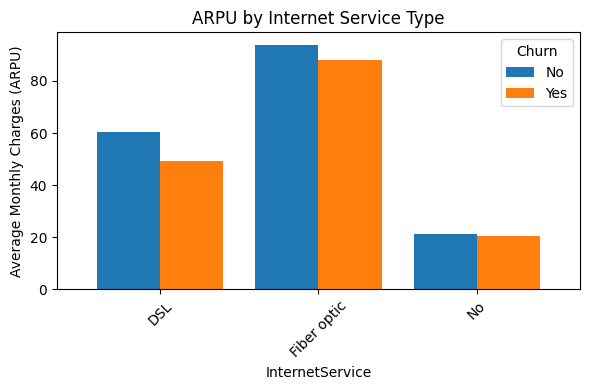

In [34]:
# Group by Internet Service and Churn
arpu_by_internet = df.groupby(['InternetService', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_internet.plot(
    kind='bar',
    figsize=(6,4),
    width=0.8  # adjust width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Internet Service Type")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Fiber Optic customers show the highest churn and represent the most at-risk segment.
- Improving pricing, service quality, and customer support for Fiber Optic users can significantly reduce churn.
- DSL and No Internet Service customers are more stable and easier to retain.

#### **4. ARPU by Contract Type**



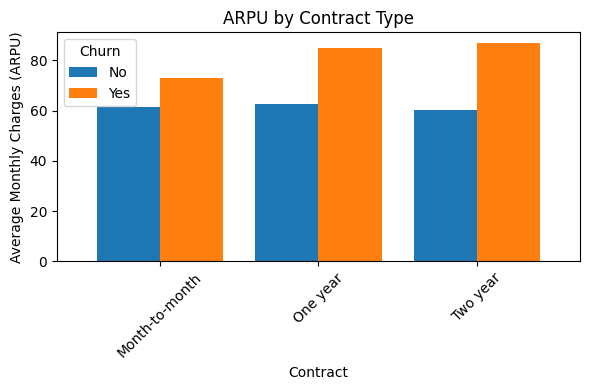

In [35]:
# Group by Contract and Churn
arpu_by_contract = df.groupby(['Contract', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_contract.plot(
    kind='bar',
    figsize=(6,4),
    width=0.8  # adjust width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Contract Type")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Key insight:** Longer customer commitment through contract incentives is highly effective at reducing attrition and creating a stable customer base.

#### **5. ARPU by Payment Method**

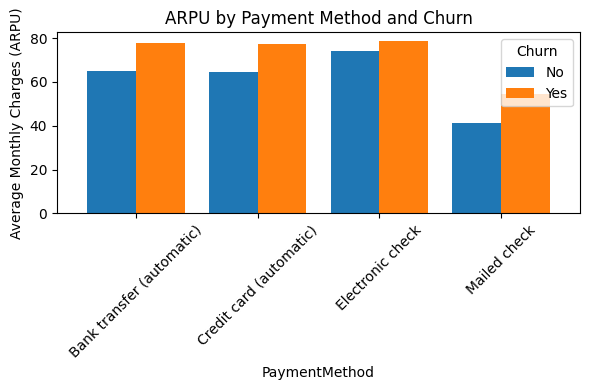

In [37]:
# Group by Payment Method and Churn
arpu_by_payment_churn = df.groupby(['PaymentMethod', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_payment_churn.plot(
    kind='bar',
    figsize=(6,4),
    width=0.8  # adjust bar width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Payment Method and Churn")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()